In [ ]:
# import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
import warnings


In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Remove Height and Weight because they are directly associated with BMI ,
# Which makes our model predict obesitt easily.
data = data.drop(columns=['Height', 'Weight'])
print(data.shape)

(2111, 15)


In [ ]:
# Converting object Variables to Categorical to makes calculations
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   float64 
 5   NCP                             2111 non-null   float64 
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   float64 
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   float64 
 11  TUE                             2111 non-null   float64 
 12  CALC                

In [ ]:
# Select relevant columns and encode categorical variables
X = data[['Age', 'family_history_with_overweight', 'SMOKE']]
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['family_history_with_overweight', 'SMOKE']]))
X = X.drop(['family_history_with_overweight', 'SMOKE'], axis=1)
X = pd.concat([X, X_encoded], axis=1)
X.columns = X.columns.astype(str)

# Convert target variable to binary labels
y = data['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 1,
                            'Overweight_Level_II': 1, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1,
                            'Obesity_Type_III': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# evaluate the performance of the model
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Precision: 0.82
Recall: 0.94
F1 Score: 0.88
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       118
           1       0.82      0.94      0.88       305

    accuracy                           0.81       423
   macro avg       0.79      0.71      0.73       423
weighted avg       0.80      0.81      0.80       423



In [ ]:
import statsmodels.api as sm

# Add intercept to the training data
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.416458
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:             NObeyesdad   No. Observations:                 1688
Model:                          Logit   Df Residuals:                     1683
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.2749
Time:                        18:52:52   Log-Likelihood:                -702.98
converged:                       True   LL-Null:                       -969.53
Covariance Type:            nonrobust   LLR p-value:                4.642e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1118   7.71e+06  -2.74e-07      1.000   -1.51e+07    1.51e+07
Age            0.1811      0

In [ ]:

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the testing set using the best estimator found in the grid search
tuned_y_pred = grid_search.best_estimator_.predict(X_test)
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: {:.2f}".format(grid_search.best_score_))
# evaluate the performance of the model
print(classification_report(y_test, tuned_y_pred))

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.77      0.48      0.59       118
           1       0.83      0.94      0.88       305

    accuracy                           0.82       423
   macro avg       0.80      0.71      0.74       423
weighted avg       0.81      0.82      0.80       423



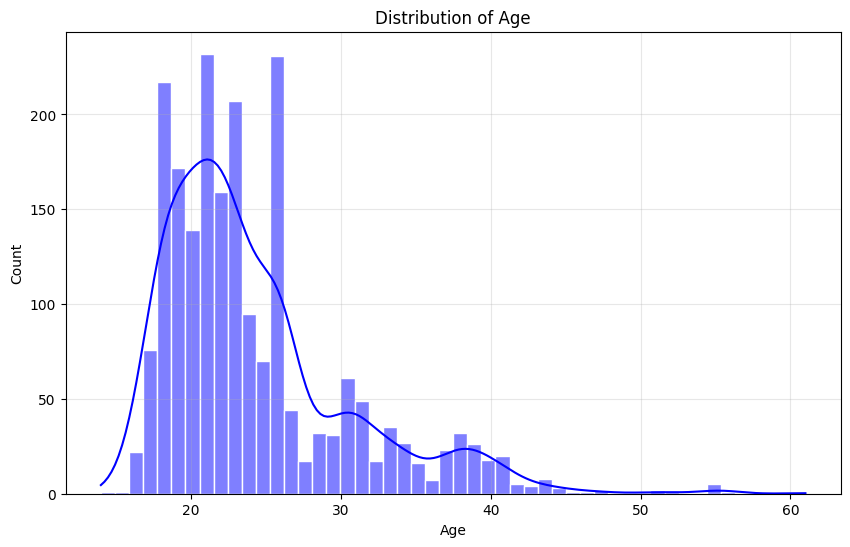

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='b', edgecolor='w')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.grid(True, alpha=0.3)
plt.show()


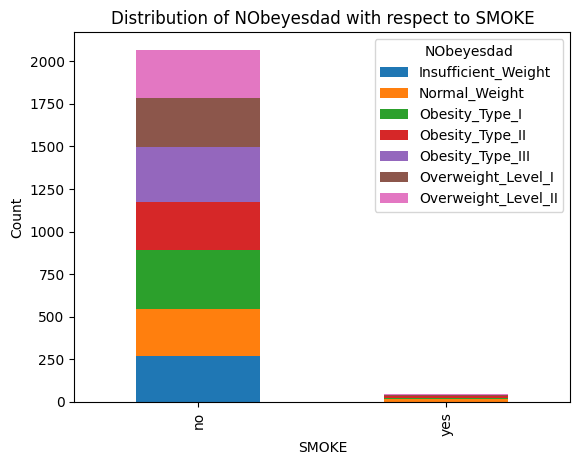

In [ ]:
smoke_counts = data.groupby(['SMOKE', 'NObeyesdad']).size().unstack()
smoke_counts.plot(kind='bar', stacked=True)
plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad with respect to SMOKE')
plt.legend(title='NObeyesdad')


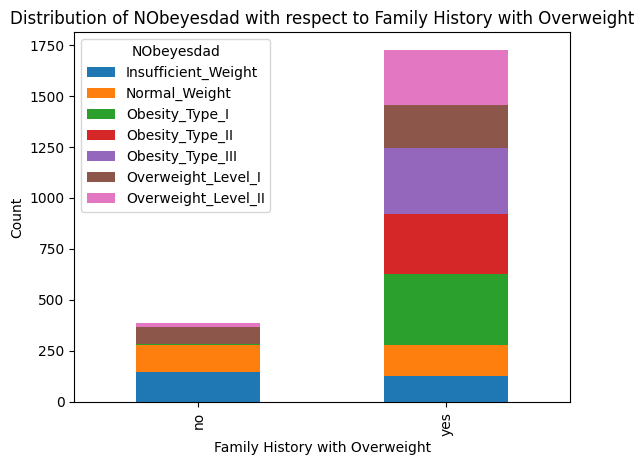

In [ ]:
family_counts = data.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack()
family_counts.plot(kind='bar', stacked=True)
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad with respect to Family History with Overweight')
plt.legend(title='NObeyesdad')


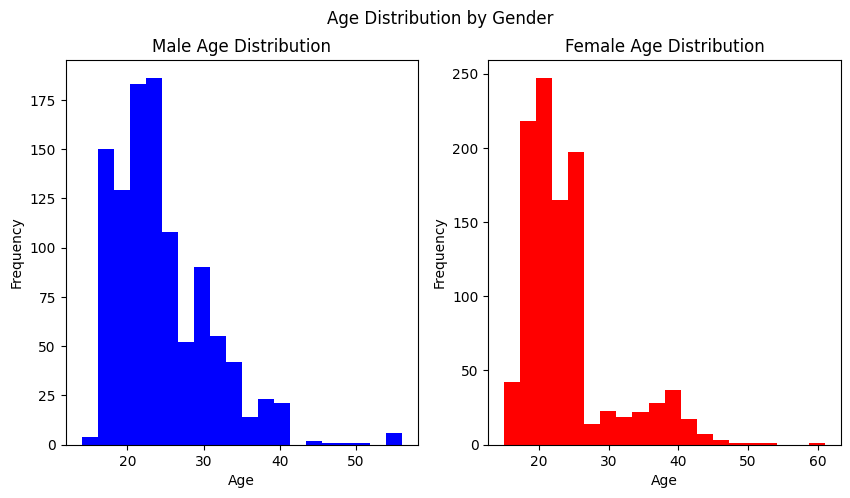

In [ ]:
# Separate data by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(male_data['Age'], bins=20, color='blue')
axs[0].set_title('Male Age Distribution')
axs[1].hist(female_data['Age'], bins=20, color='red')
axs[1].set_title('Female Age Distribution')

# Set axis labels and title
for ax in axs:
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
fig.suptitle('Age Distribution by Gender')
plt.show()
